Uber is a transportation company with an app that allows passengers to hail a ride and drivers to charge fares and get paid.

### Let us Analyze how uber company is growing

In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
import calendar
%matplotlib inline

In [11]:
df = pd.read_csv("My Uber Drives - 2016.csv")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [15]:
df.isnull().sum()
df = df.dropna()

Next, we notice that the date columns contain some composite information such as day, day of the week, month, and time. Separating them gives us more granular information to explore.

In [16]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format = "%m/%d/%Y %H:%M")
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = "%m/%d/%Y %H:%M")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2656\3538050973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format = "%m/%d/%Y %H:%M")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2656\3538050973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = "%m/%d/%Y %H:%M")


In [19]:
df['HOUR'] = [x.hour for x in df['START_DATE*']]
df['DAY'] = [x.hour for x in df['START_DATE*']]
df['MONTH'] = [x.hour for x in df['START_DATE*']]
df['WEEKDAY'] = [calendar.day_name[x.dayofweek] for x in df['START_DATE*']]
df['DAY_OF_WEEK'] = [x.dayofweek for x in df['START_DATE*']]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2656\1899565138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = [x.hour for x in df['START_DATE*']]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2656\1899565138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAY'] = [x.hour for x in df['START_DATE*']]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2656\1899565138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [20]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,21,21,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,20,20,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,17,17,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,14,14,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,17,17,Wednesday,2


In [28]:
df.shape

(653, 12)

In [29]:
## This column is imbalanced
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='PURPOSE*', ylabel='count'>

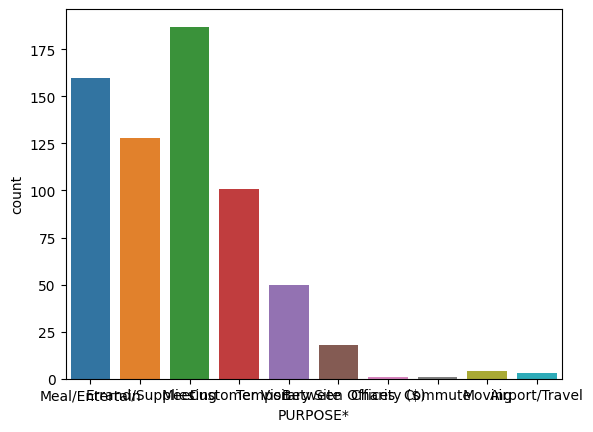

In [30]:
# plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PURPOSE*')

Next, let us see at what time of the day the user rides an Uber the most.

<Axes: >

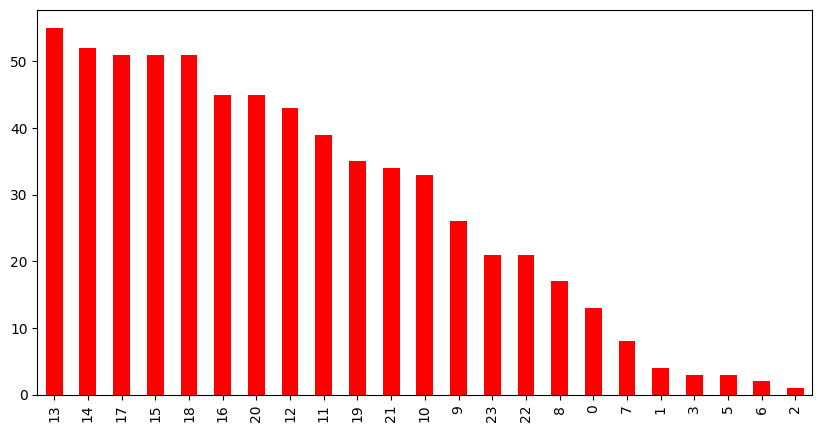

In [33]:
hours = df['HOUR'].value_counts()
hours.plot(kind='bar', color='red', figsize=(10,5))

It is very apparent here that the user travels during lunch hours and in the early evenings more than the rest of the day. It might be, so that client visits or client lunches occur more frequently between 1 PM-5 PM than the rest of the day.

<Axes: >

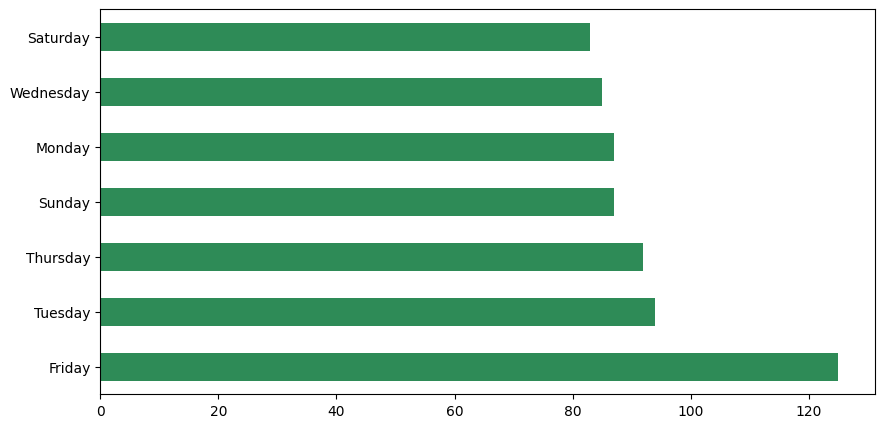

In [34]:
days = df['WEEKDAY'].value_counts()
days.plot(kind='barh', color='seagreen', figsize=(10,5))

While the user travels almost regularly each day of the week, he travels more on Fridays. Since we know he travels in the evenings too, we can assume that the additional number of trips on Fridays might be recreational.

Further, we can also look at the month-wise distribution of Uber trips.

<Axes: >

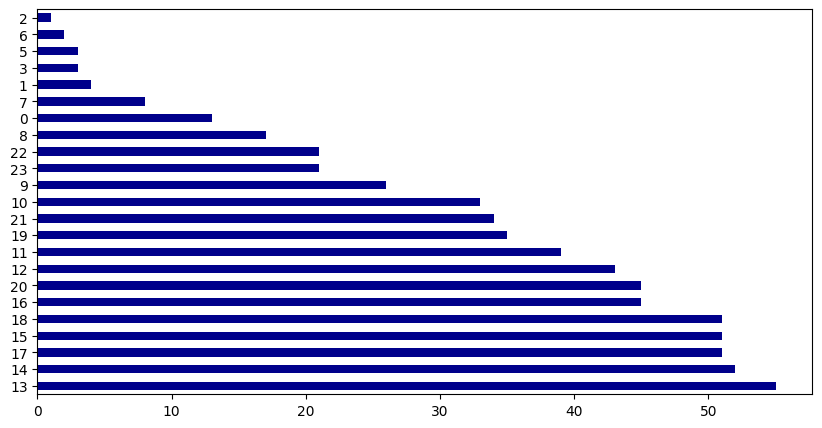

In [38]:
months = df['MONTH'].value_counts()
months.plot(kind='barh', color='darkblue', figsize=(10,5))

Now, taking a different direction, let’s see where the user traveled to and from in an Uber.

In [40]:
df.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,21,21,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,20,20,Saturday,5


<Axes: >

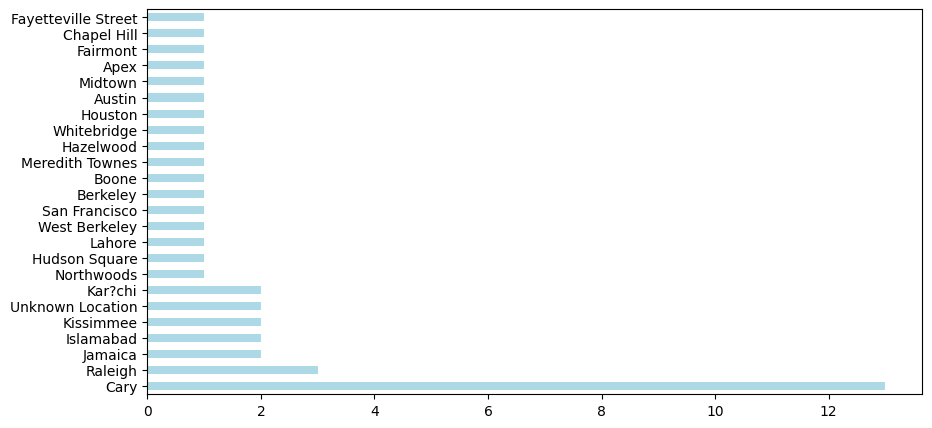

In [46]:
months = df['START*'][df['MONTH']==12].value_counts()
months.plot(kind='barh', color='lightblue', figsize=(10,5))

The skewed number of trips start from Cary could mean that the user either resides or works in this region.

<Axes: >

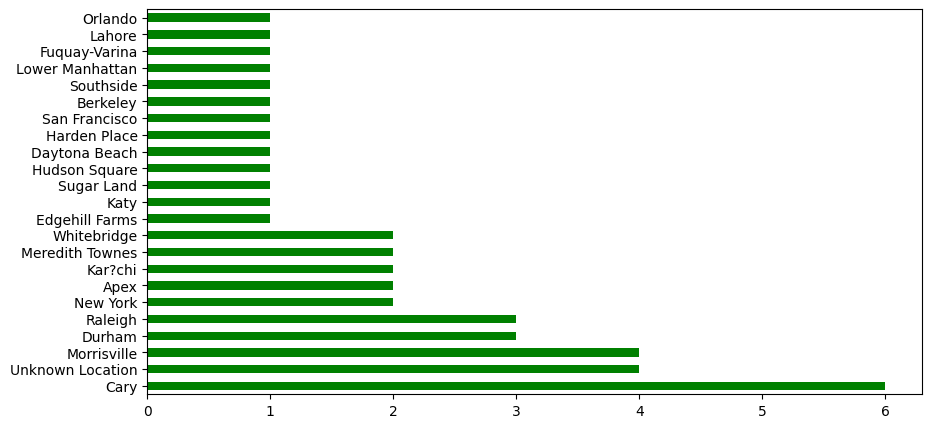

In [48]:
months = df['STOP*'][df['MONTH']==12].value_counts()
months.plot(kind='barh', color='green', figsize=(10,5))

An interesting observation is how most of these places are the same as the pick-up points. This confirms the intuition that the user usually commutes around Cary or Morrisville.

However, we can still check how often the user takes particular “trips” from location A to B.